### Visão geral

Aqui vou resumir o conteúdo aprendido sobre word embedding. Em suma, essa estratégia é usada em modelos de NLP complexos e é útil para:

    1. Tradução
    2. Extração de Informação
    3. Responder Perguntas
    4. Analogia Semântica e Similaridade
    5. Análise de Sentimento
    6. Classificação de Feedback de Cliente
    
Objetivos aqui serão: identificar os conceitos chaves de word embedding, gerar word embeddings, preparar texto para aprendizado de máquina e implementar o modelo continuous bag of words (CBOW).

### Representação de Palavras

Quando tratamos até então representação de palavras, vimos a priore o <b>vocabulário</b>. Vocabulário consiste em um dicionário onde cada palavra representa um número. Esse modelo de representação traz um problema, sendo sucinto, <b>não há motivos para uma palavra vir antes ou depois da outra</b> isto porque o vocabulário é construído pela ordem que a palavra foi vista.

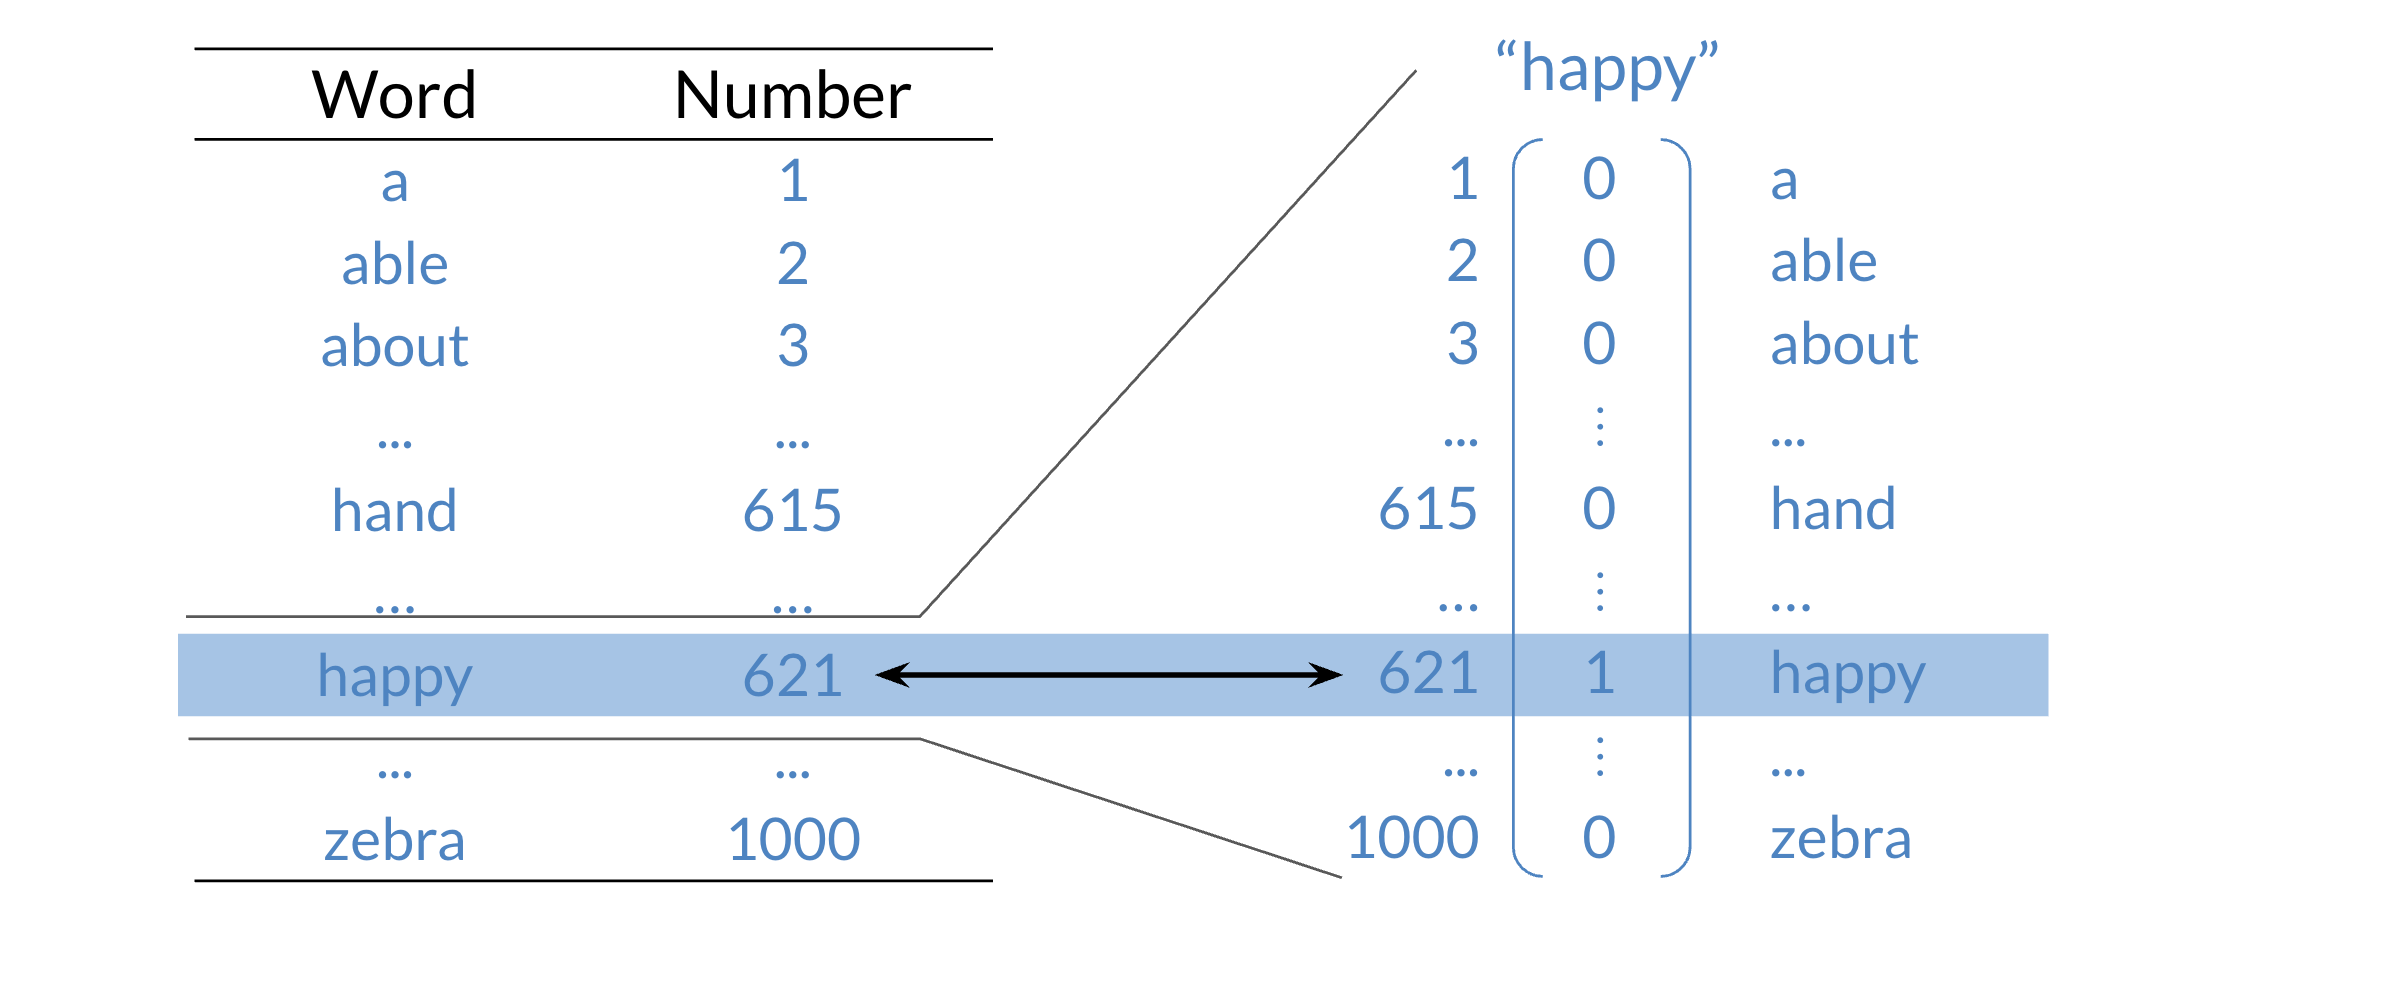

Outro método de representação é o <b>one-hot encodding</b>(Apresentado na figura acima), nesse caso o vocabulário é usado para formar uma matriz, onde cada linha é o vetor que representa aquela palavra. Acima temos o exemplo do vetor que representa a palavra "happy". A grande <b>desvantagem desse método é que os vetores tendem a ser imensos e também as palavras não tem nenhuma relação semântica codificada</b>.

A ideia do <b>word-embendding</b> é justamente trazer uma representação vetorial onde traga valor semântico embutido nas palavras. Podemos pensar em cada dimensão como sendo dito algo sobre aquela palavra. Nesse caso as <b>vantagens são dimensão menor que on-hot encodding, e captura de semântica</b>. A figura abaixo mostra uma representação gráfica de word embendding.

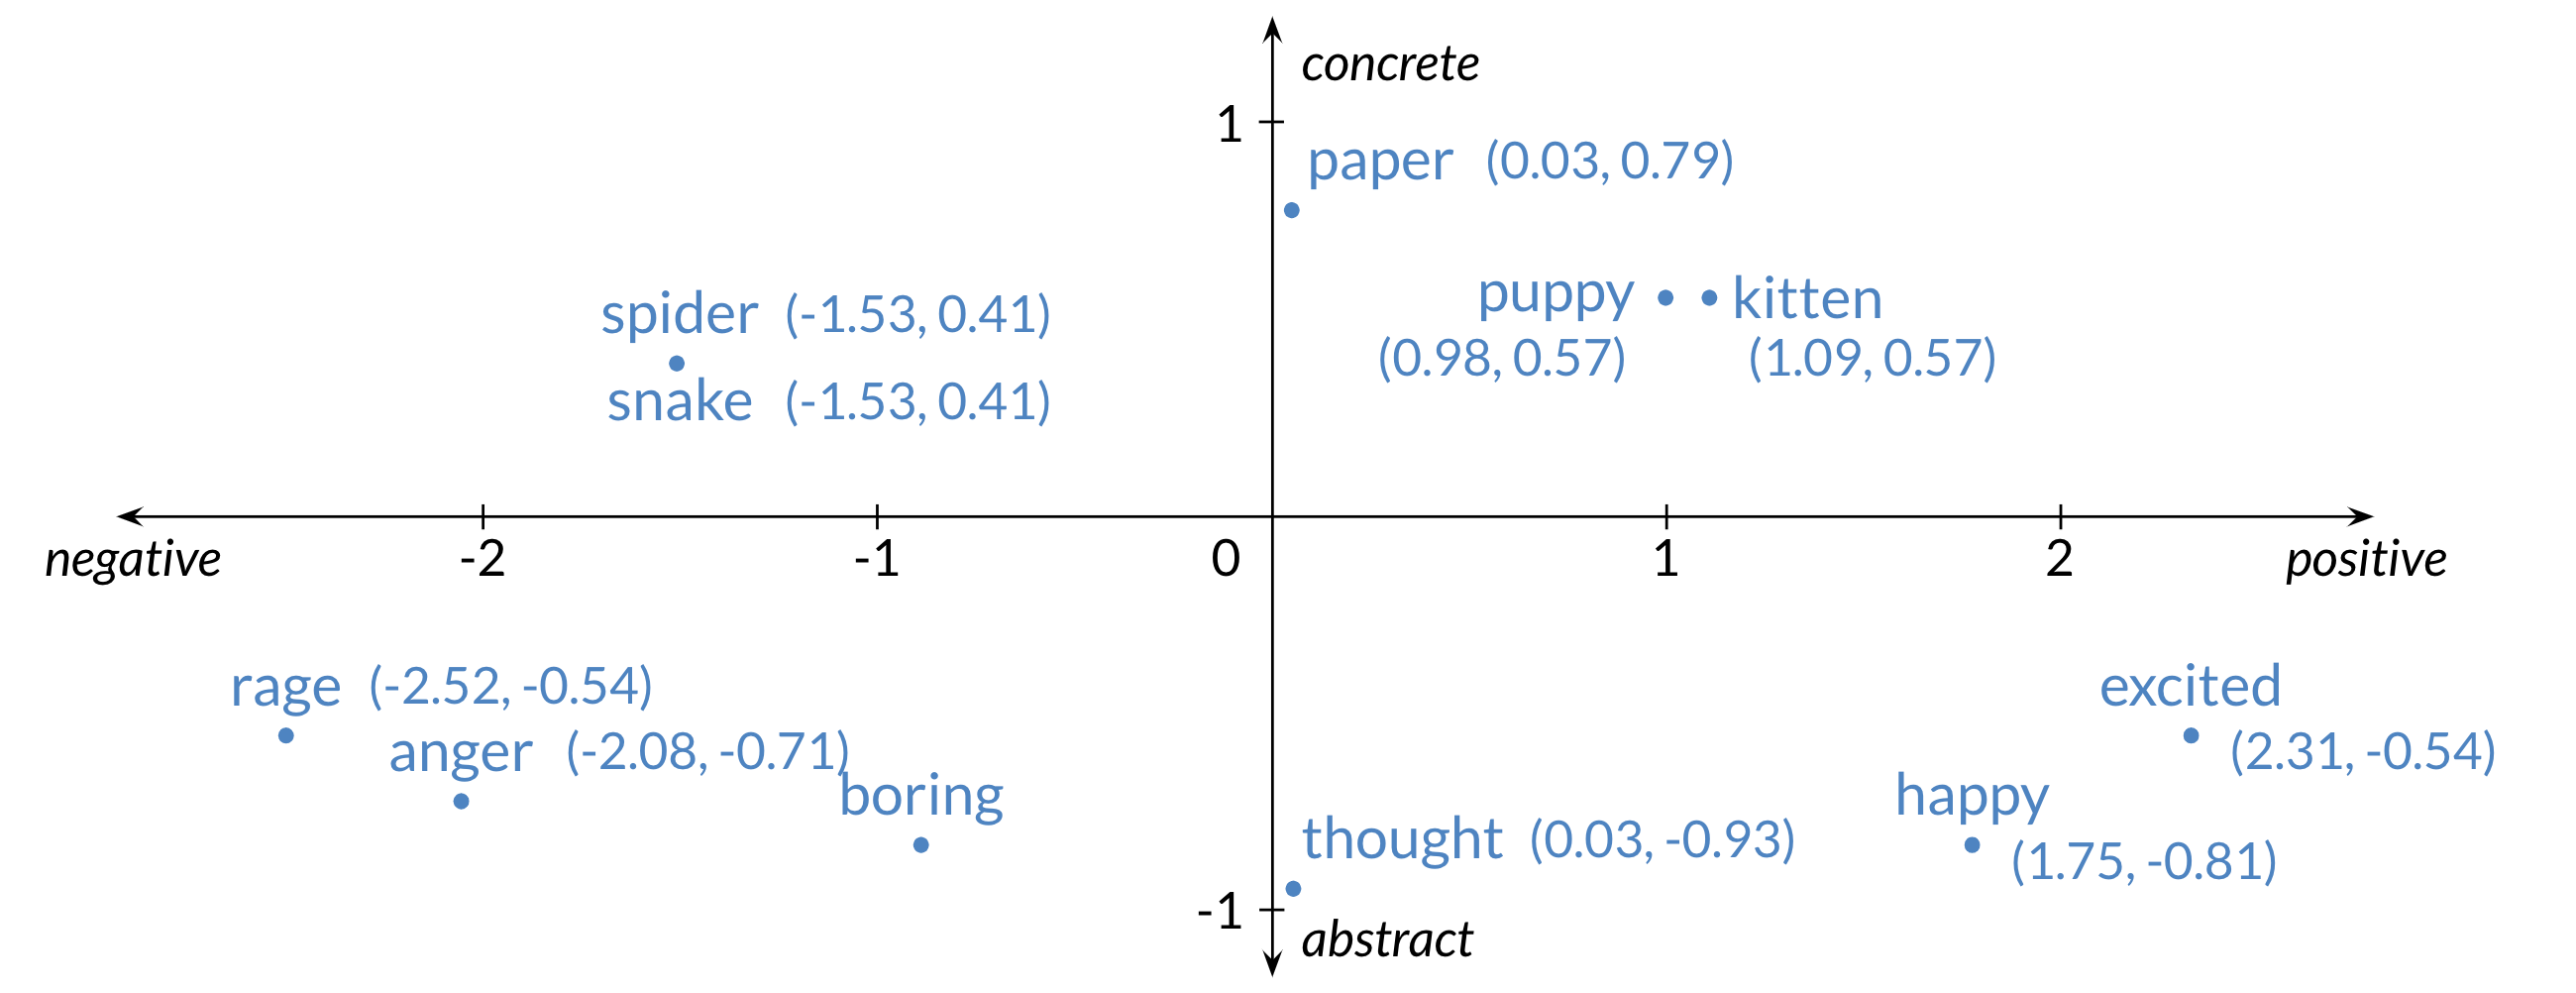

### Como Criar Word-Embenddings

O processo para criar word-embeddings é necessário os seguintes artefatos:

    1. Corpus
    2. Processo de Transformação
    3. Embendding Method
    
O <b>corpo</b> é o elemento que será preprocessado para o treino. Ele pode ter um propósito-geral ou específico. A partir do corpo, ocorre o <b>processo de transformação</b>, nesse processo o texto vai ser preprocessado de alguma forma para alimentar o modelo de ML. O <b>embendding method</b> é justamente o método que vai agregar valor semântico à vetorização. Esse processo consiste em treinar um modelo de ML com uma tarefa de aprendizado (Exemplo: prever uma palavra central dada as palavras ao redor). E por ser um modelo de ML, nele podemos configurar uma série de hiperparâmetros para melhorar os resultados. A figura abaixo apresenta o processo de word-embendding.

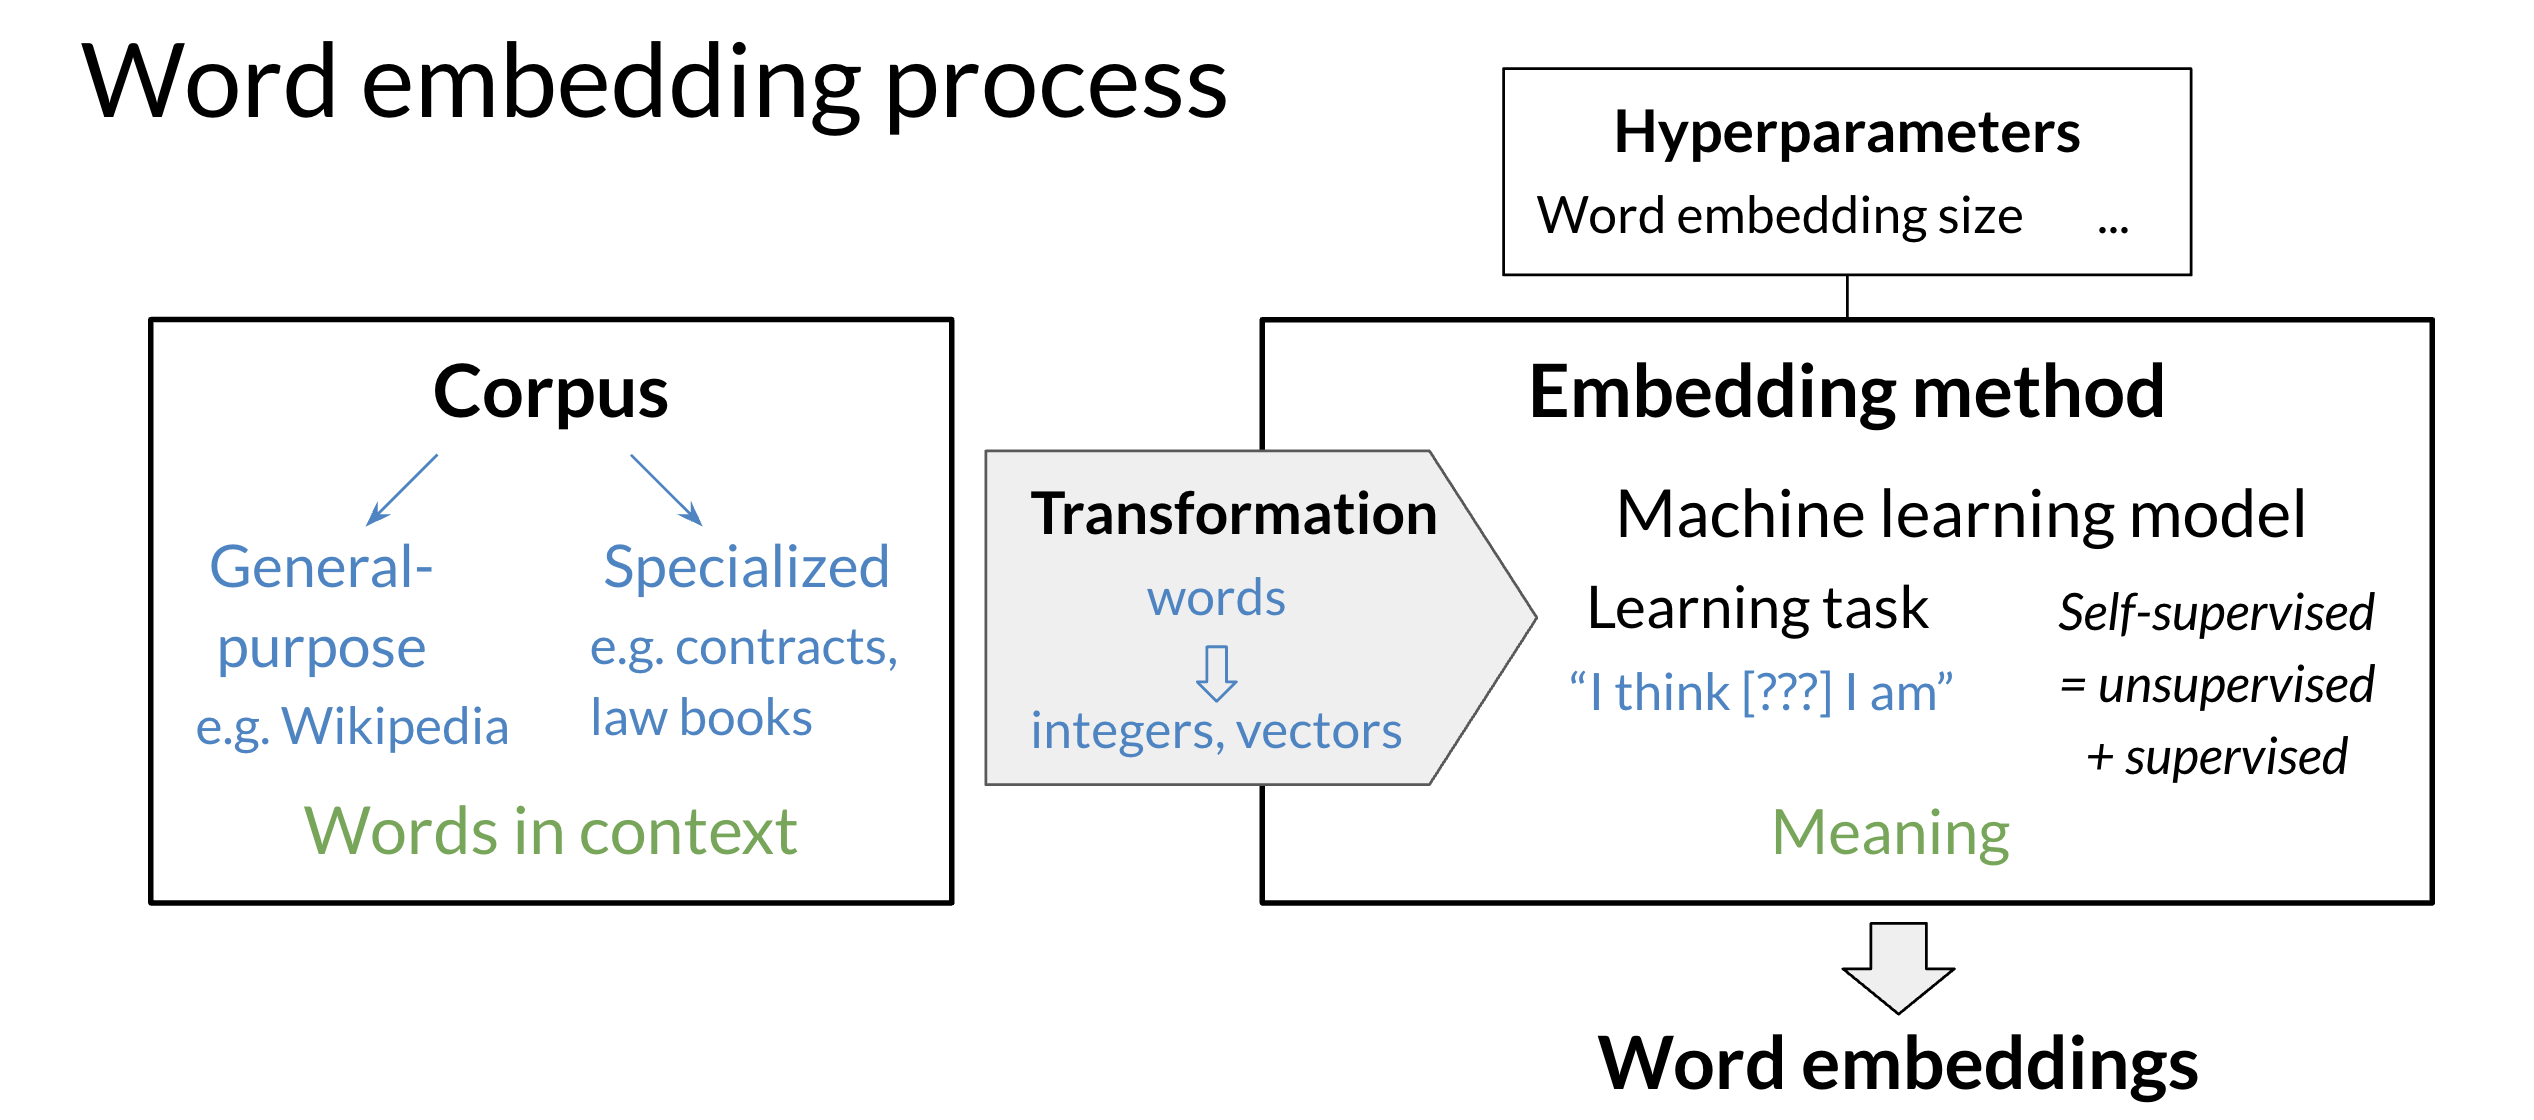

### Métodos da Literatura:
#### Classical Methods
word2vec (Google, 2013)
Continuous bag-of-words (CBOW): Prediz a palavra central baseado nas palavras ao redor.

Continuous skip-gram / Skip-gram with negative sampling (SGNS): Aprende a predizer as palavras ao redor baseada em palavras de entrada.

Global Vectors (GloVe) (Stanford, 2014): factorizes the logarithm of the corpus's word co-occurrence matrix,  similar to the 
count matrix you’ve used before (Ver lições anteriores).

fastText (Facebook, 2016): based on the skip-gram model and takes into account the structure of words by representing words as an n-gram of characters. It supports out-of-vocabulary (OOV) words.
#### Deep learning, contextual embeddings
 In these more advanced models, words have different embeddings depending on their context. You can download pre-trained embeddings for the following models. 

BERT (Google, 2018):

ELMo (Allen Institute for AI, 2018)

GPT-2 (OpenAI, 2018)

### CBOW

A estratégia que vamos aplicar aqui é a continuous bag of words, nesse caso a estratégia se preocupa em prever uma palavra dado um contexto. Por <b>contexto</b> eu me refiro as palavras que estão depois e antes da palavra que se deseja predizer. Assim, trabalhamos com um parâmetro C para dizer quantos vizinhos iremos permitir no modelo.

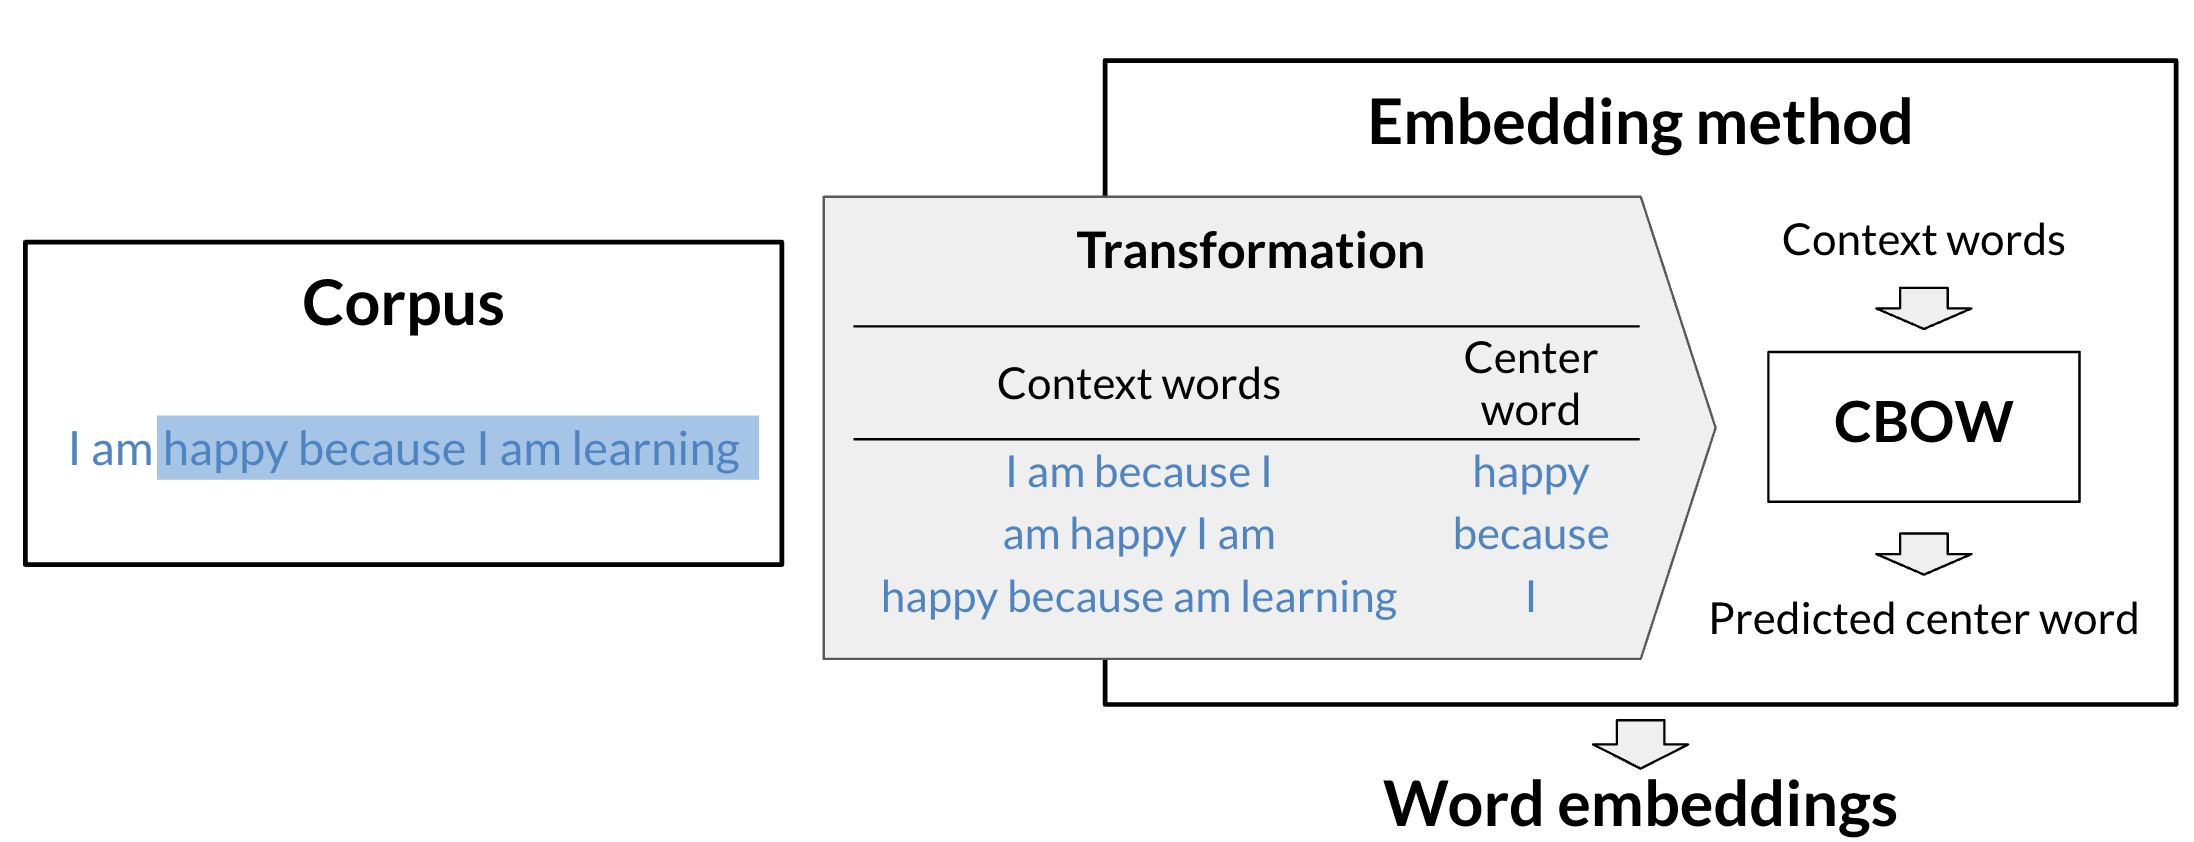</img>
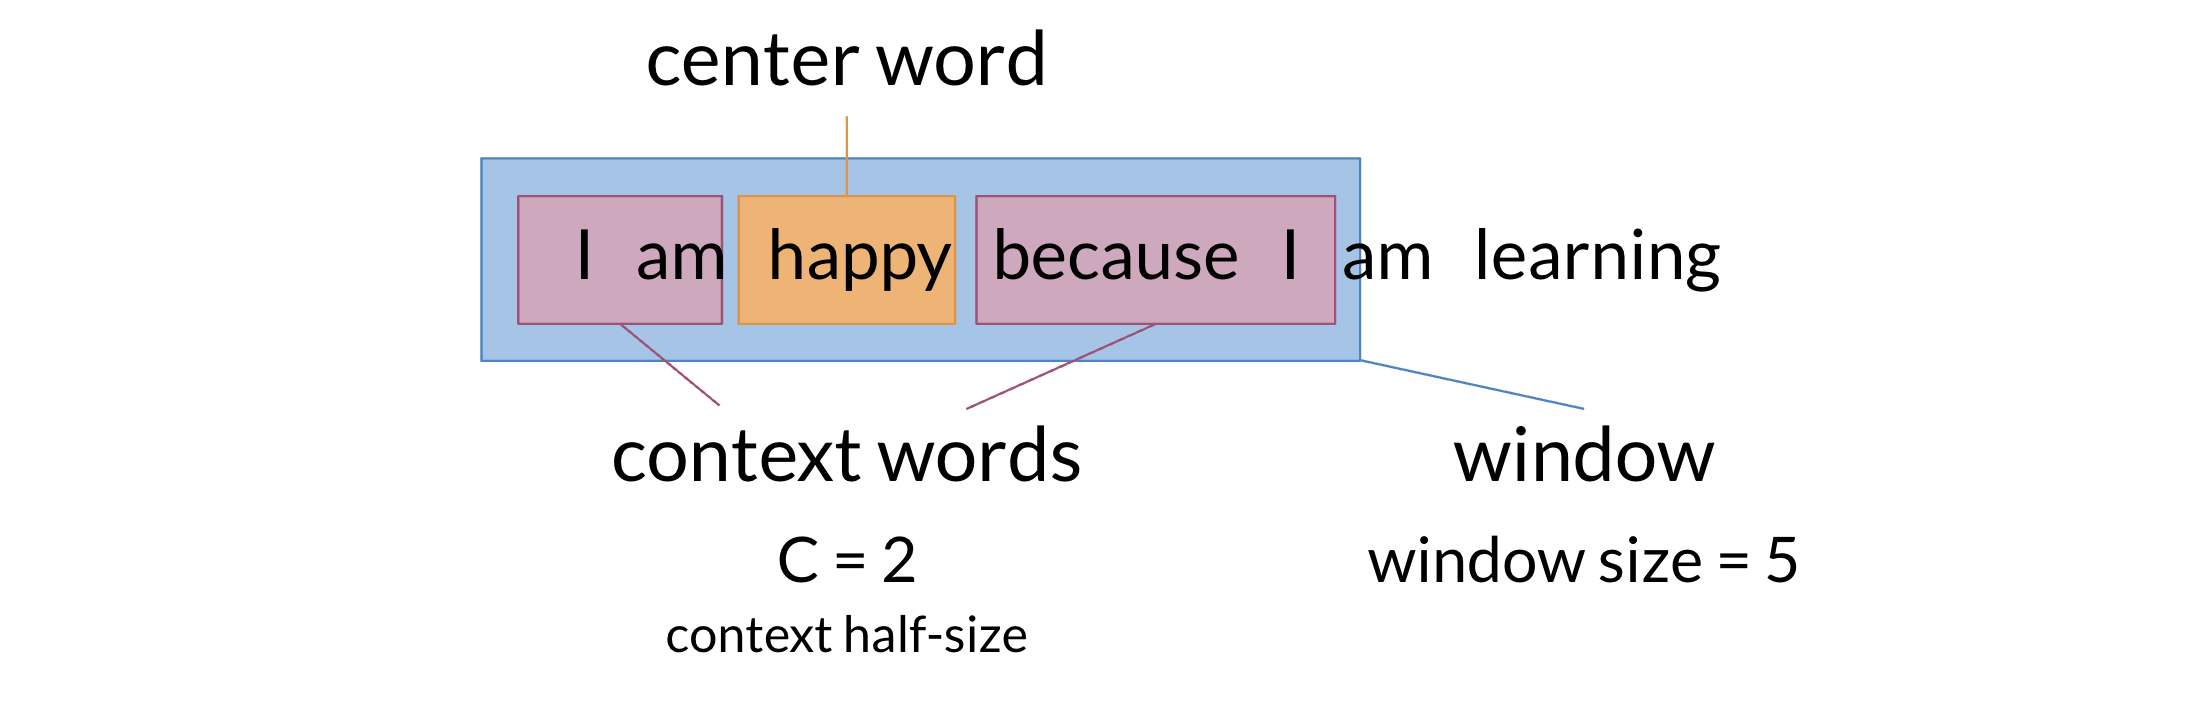</img>

Na figura a esquerda é apresentado a estratégia do modelo, já na figura a direita é apresentada a janela de deslizamento que o algoritmo realiza.

In [1]:
import urllib.request
import urllib.parse
import re
import numpy as np
import nltk

def normalize(vec):
    return vec/(np.linalg.norm(vec))
import re
try: 
    from BeautifulSoup import BeautifulSoup
except ImportError:
    from bs4 import BeautifulSoup

maxRange = 20
portugCorpus = []
for index in range(1,maxRange):
    url = "https://bibliaportugues.com/kja/genesis/"+str(index)+".htm"
    response = urllib.request.urlopen(url)
    if(response.status < 300):
        contents = response.read()
        contents = contents.decode("utf-8")
        parsed_html = BeautifulSoup(contents)
        htmlTextArray = parsed_html.body.find_all('span', attrs={'class':'maintext'})
        textArray = [ele.text for ele in htmlTextArray]
        portugCorpus += textArray

### Tokenizando

Até então o processo de tokenização foi feito a mão. Mas uma boa prática é fazer uso de bibliotecas existentes como o nltk. Aí estou usando um pacote chamado <b>punkt</b> que lida com a parte de tokenização. 

In [2]:
from nltk import tokenize
import re
#nltk.donwload()
data = "\n".join(portugCorpus)
data = re.sub(r'[!?;-]+','.',data)
data = tokenize.word_tokenize(data, language='portuguese')
data = [ch.lower() for ch in data if ch.isalpha() or ch == "."]

### Slide Window

Aqui é um algoritmo simples de janela deslizante que prepara os dados para treino. C é o tamanho do contexto que vai ser considerado adiante e atrás da palavra central.

In [86]:
def janela_deslizante(palavras, C):
    i = C
    centers = []
    contexts = []
    while i < len(palavras) - C:
        center = palavras[i]
        context = palavras[(i-C):i] + palavras[(i+1):(i+C+1)]
        contexts.append(context)
        centers.append(center)
        i += 1
    return contexts, centers

### Criando o vocabulário
Abaixo printei o total de tokens, e o tamanho do vocabulário.

In [87]:
setVocabulary = list(set(data))
vocabulary = dict([(setVocabulary[i],i) for i in range(len(setVocabulary))])
len(data),len(vocabulary)

(11528, 2071)

### Aplicando Slide Window

In [88]:
import pandas as pd
transformed_data = list(janela_deslizante(data,6))
transformed_data = {'Context':transformed_data[0], 'Center':transformed_data[1]}
transformed_data = pd.DataFrame(transformed_data)
transformed_data.head()

,Context,Center
0,"[no, princípio, deus, criou, os, céus, a, terr...",e
1,"[princípio, deus, criou, os, céus, e, terra, ....",a
2,"[deus, criou, os, céus, e, a, ., a, terra, ent...",terra
3,"[criou, os, céus, e, a, terra, a, terra, entre...",.
4,"[os, céus, e, a, terra, ., terra, entretanto, ...",a


In [89]:
#Vou fazer uma abordagem ruim pra economizar memória
def word_to_vector(word, vocabulary):
    n = len(vocabulary)
    array = np.zeros((n,1))
    array[vocabulary[word]] = 1
    return array

def append_vector(data,vocabulary):
    list_ = []
    for word in data:
        list_.append(word_to_vector(word, vocabulary))
    return list_

center_vectors = append_vector(transformed_data.Center,vocabulary)
context_vectors = []

for words in transformed_data.Context:
    arr = append_vector(words, vocabulary)
    arr = np.mean(arr, axis = 0)
    context_vectors.append(arr)

len(context_vectors),len(center_vectors)
transformed_data["ContextVectors"] = context_vectors
transformed_data["CenterVectors"] = center_vectors

In [90]:
transformed_data.head()

,Context,Center,ContextVectors,CenterVectors
0,"[no, princípio, deus, criou, os, céus, a, terr...",e,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
1,"[princípio, deus, criou, os, céus, e, terra, ....",a,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
2,"[deus, criou, os, céus, e, a, ., a, terra, ent...",terra,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
3,"[criou, os, céus, e, a, terra, a, terra, entre...",.,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
4,"[os, céus, e, a, terra, ., terra, entretanto, ...",a,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."


### Teste para saber se todos os vetores de contexto foram compudatos corretamente

In [91]:
#teste de fidelidade
flag = True
for vec in transformed_data.ContextVectors:
    if 1 - np.sum(vec) > .00001 :
        print(np.sum(vec),"Erro, a soma de todos os valores devem ser 1")
        flag = False
if(flag):
    print("Passou nos testes!")

Passou nos testes!


In [92]:
index = 5
for word in transformed_data.Context[index]:
    print(word,transformed_data.ContextVectors[index][vocabulary[word]])

céus [0.08333333]
e [0.16666667]
a [0.16666667]
terra [0.08333333]
. [0.08333333]
a [0.16666667]
entretanto [0.08333333]
era [0.08333333]
sem [0.08333333]
forma [0.08333333]
e [0.16666667]
vazia [0.08333333]


### Criando uma rede neural densa para CBOW

A proposta do CBOW usa uma RNA densa, com uma única camada escondida. A primeira camada faz uso da função de ativação ReLU, e a segunda camada faz uso da função de ativação Softmax. A arquitetura da rede proposta é a seguinte:

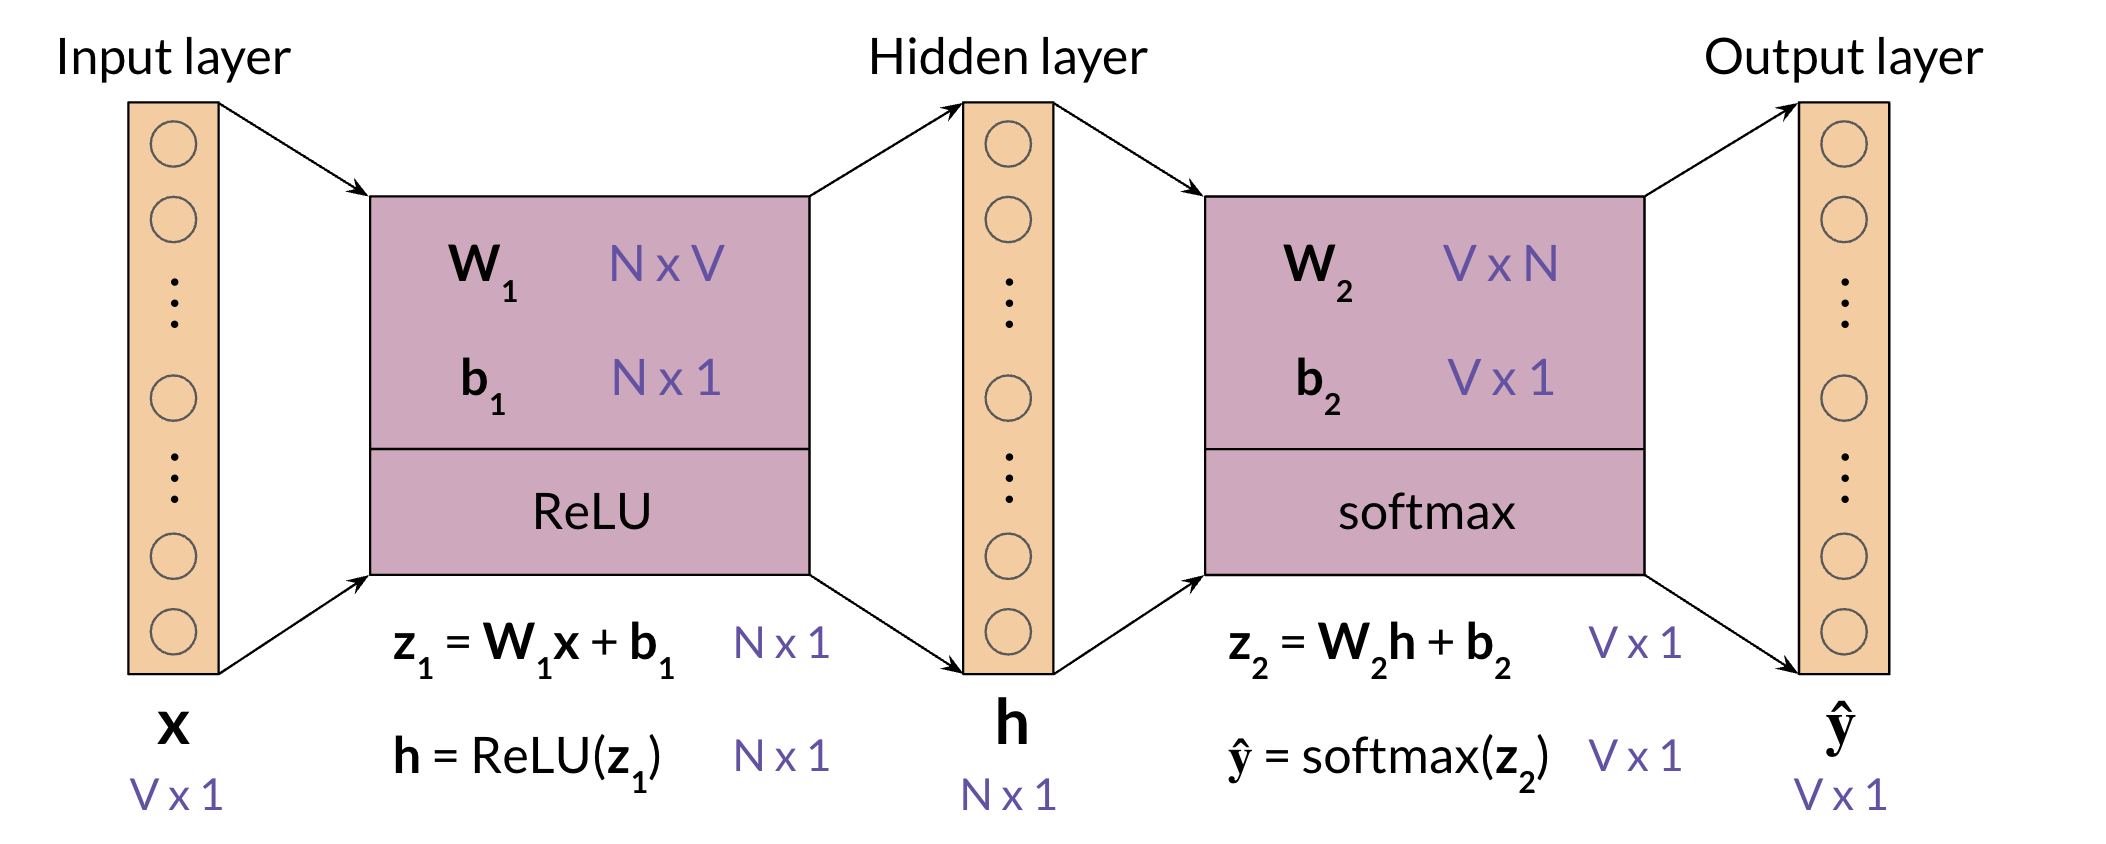

Nessa arquitetura temos <b>V</b> como o tamanho do vocabulário. Temos <b>N</b> como o tamanho que será dado para o word-embending. Os demais termos são auto-explicativos. <b>Lembrando que no caso de aplicar batch</b> o que muda será a dimensão coluna do x, que vai de 1 para M. Isso de nenhuma forma afeta as equações acima. As figuras abaixo simplesmente apresentam as funções ReLU e Softmax, não vou explica-las porque já vi várias vezes.

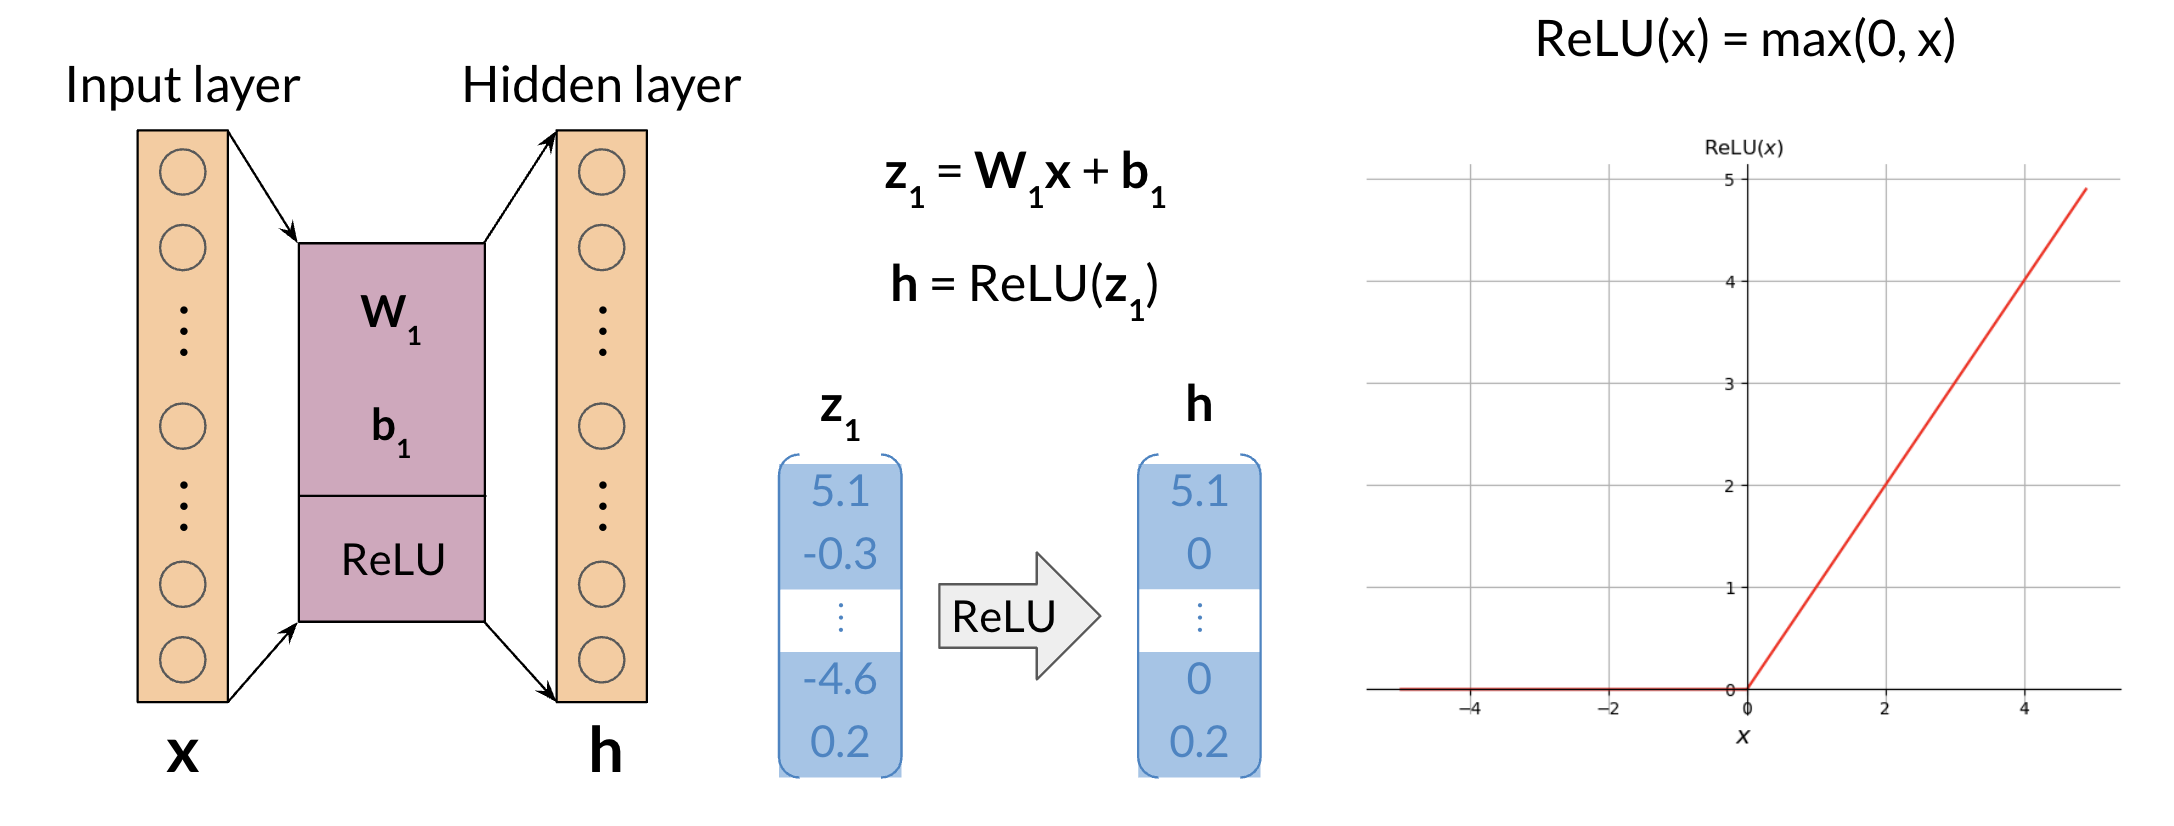</img>
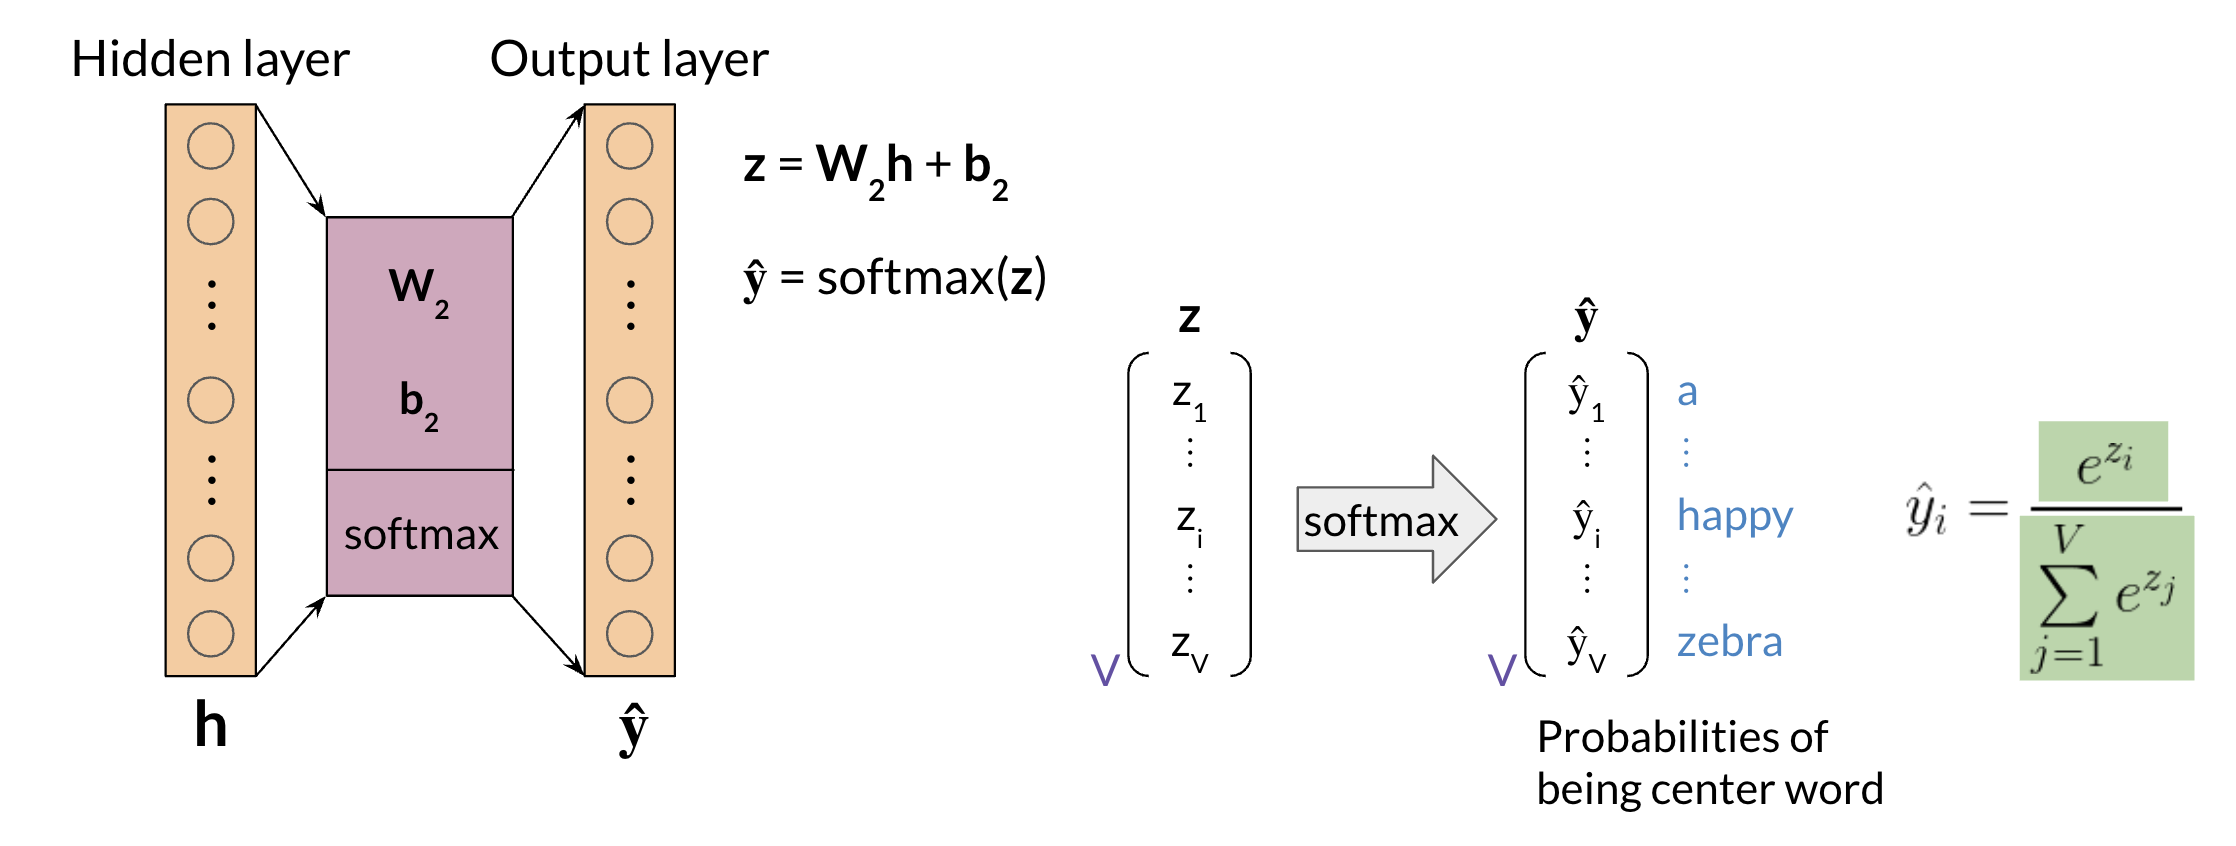</img>

In [93]:
embendding_size = 100
batch_size = 1
W = [
    np.random.random(size = (embendding_size,len(vocabulary))),
    np.random.random(size = (len(vocabulary),embendding_size)),
]
B = [
    np.random.random(size = (embendding_size,batch_size)),
    np.random.random(size = (len(vocabulary),batch_size)),
]
print(W[0].shape,B[0].shape,W[1].shape,B[1].shape,)

def ReLU(z):
    z[z < 0] = 0
    return z
    
def Softmax(z):
    return (np.e**z)/np.sum(np.e**z,axis = 0)

(100, 2071) (100, 1) (2071, 100) (2071, 1)


#### Checando se as funções retornam matrizes no formato esperado.

In [94]:
ReLU(np.dot(W[0],transformed_data.ContextVectors[0]) + B[0]).shape,Softmax(np.dot(W[0],transformed_data.ContextVectors[0]) + B[0]).shape

((100, 1), (100, 1))

### Ajustando a matriz para batch

Cara, aqui é um pouco confuso, mas vamos prestar atenção que da certo.
Os vetores formados estão todos na forma coluna, ou seja são Nx1. Então é uma "tripinha" na vertical.
Eu preciso manter esses vetores nesse formato e pegar de M em M, onde M é o batch_size.

Pra fazer isso eu preciso passar os vetores do pandas para o numpy, e aqui que tá a brincadeira porque eu passei para as linhas do vetor numpy. Isso significa que eu tive que transpor cada vetor coluna em linha.

Depois eu transpus a matriz resultante. 
Como resultado eu devo ter a forma VxTotalAmostras, onde V é o tamanho do vocabulário e TotalAmostras são o total de amostras que existem para o treino.

In [95]:
numpy_context_vectors = np.zeros(shape = (transformed_data.ContextVectors.shape[0],len(vocabulary)))
print(numpy_context_vectors.shape, transformed_data.ContextVectors.shape)
for i in range(transformed_data.ContextVectors.shape[0]):
    numpy_context_vectors[i] += transformed_data.ContextVectors[i].reshape(len(vocabulary),).transpose()/transformed_data.ContextVectors.shape[0]
numpy_context_vectors = numpy_context_vectors.transpose()

numpy_center_vectors = np.zeros(shape = (transformed_data.CenterVectors.shape[0],len(vocabulary)))
for i in range(transformed_data.CenterVectors.size):
    numpy_center_vectors[i] = transformed_data.CenterVectors.iloc[i].reshape(len(vocabulary),).transpose()
numpy_center_vectors = numpy_center_vectors.transpose()

numpy_context_vectors.shape,numpy_center_vectors.shape

(11516, 2071) (11516,)


((2071, 11516), (2071, 11516))

In [96]:
batch_size = 10

B = [
    np.random.random(size = (embendding_size,batch_size)),
    np.random.random(size = (len(vocabulary),batch_size)),
]

ReLU(np.dot(W[0],numpy_context_vectors[:,:batch_size]) + B[0]).shape,Softmax(np.dot(W[0],numpy_context_vectors[:,:batch_size]) + B[0]).shape

((100, 10), (100, 10))

### Cross Entropy

Para calcularmos o quão nosso modelo está predizendo de forma correta, é preciso de uma função que compute a perca. A função de entropia cruzada é util para modelos de classificação (multiclasse). Ela é expressa da seguinte forma:

$$ CrosEntropy= -\sum_{k=1}^{V}{y \log{\hat{y}}}$$

Denota-se por V o conjunto de palavras do vocabulário.

In [97]:
def cross_entropy(y,y_hat):
    return -1*np.log(y_hat[np.argmax(y)])

testey = transformed_data.CenterVectors[transformed_data.Center == "deus"].iloc[0]
testeyhat = np.random.random(size = testey.shape)
testeyhat[np.argmax(testey)] = .9
cross_entropy(testey,testeyhat)

array([0.10536052])

### Propagação para frente

In [98]:
def forward_propagation(X,W,B):
    Z = [
        np.dot(W[0],X) + B[0]
    ]
    H = [
        ReLU(Z[0])
    ]
    Z += [
        np.dot(W[1],H[0]) + B[1]
    ]
    H += [
        Softmax(Z[1])
    ]
    return Z,H

Z,H = forward_propagation(numpy_context_vectors[:,:batch_size],W,B)

### Cross Entropy (Batch)

A ideia da Batch de entropia cruzada é simplesmente tirar a média dos custos. ie:

$$ CrosEntropy= -\frac{1}{m}\sum_{j=1}^{m}\sum_{k=1}^{V}{y^{(j)}_{(k)} \log{\hat{y}^{(j)}_{(k)}}}$$

In [99]:
def cross_entropy_batch(Y,Yhat):
    result = 0
    for index in range(Y.shape[1]):
        result += cross_entropy(Y[:,index],Yhat[:,index])
    return result/Y.shape[1]
        
cross_entropy_batch(numpy_center_vectors[:,:batch_size],H[1])

8.766938090939572

### Propagação para trás

Devem ser computadas as derivadas parciais em relação a $W_{1}, W_{2}, B_{1}$ e $B_{2}$. Essas derivdas são as seguintes (Tome $m$ pelo tamanho da batch e $1$ por um vetor unitário):

$$\frac{\partial J_{batch}}{\partial W_{1}} = \frac{1}{m}ReLU(W_{2}^{T}(\hat Y - Y))X^{T}$$

$$\frac{\partial J_{batch}}{\partial W_{2}} = \frac{1}{m}(\hat Y - Y)H^{T}$$

$$\frac{\partial J_{batch}}{\partial B_{1}} = \frac{1}{m}ReLU(W_{2}^{T}(\hat Y - Y))1_{m}^{T}$$

$$\frac{\partial J_{batch}}{\partial B_{2}} = \frac{1}{m}(\hat Y - Y)1_{m}^{T}$$

In [100]:
def backward_propagation(X,W,B,H,Y):
    Yhat = H[1]
    m = H[1].shape[1]
    partial_w_relu_arg = np.dot(W[1].transpose(),Yhat - Y)
    partial_W = [
        (1/m)*np.dot(ReLU(partial_w_relu_arg),X.transpose()),
        (1/m)*np.dot((Yhat - Y),H[0].transpose()),
    ]
    
    partial_B = [
        (1/m)*np.sum(ReLU(partial_w_relu_arg), axis = 1, keepdims=True),
        (1/m)*np.sum(Yhat-Y, axis =1 ,keepdims=True)
    ]
    return partial_W, partial_B

In [101]:
teste_Y = numpy_center_vectors[:,:batch_size]
teste_X = numpy_context_vectors[:,:batch_size]
Z,H = forward_propagation(teste_X,W,B)
p_W, p_B = backward_propagation(teste_X,W,B,H,teste_Y)
print(W[0].shape,p_W[0].shape)
print(W[1].shape,p_W[1].shape)
print(B[0].shape,p_B[0].shape)
print(B[1].shape,p_B[1].shape)

(100, 2071) (100, 2071)
(2071, 100) (2071, 100)
(100, 10) (100, 1)
(2071, 10) (2071, 1)


### Descida de gradiente

In [102]:
from IPython.display import clear_output

def gradient_descent(X,Y,coef = .05,batch_size=14):
    W = [
        np.random.random(size = (embendding_size,len(vocabulary))),
        np.random.random(size = (len(vocabulary),embendding_size)),
    ]
    B = [
        np.random.random(size = (embendding_size,batch_size)),
        np.random.random(size = (len(vocabulary),batch_size)),
    ]
    batch_X = np.split(numpy_context_vectors, numpy_context_vectors.shape[1]/batch_size, axis = 1)
    batch_Y = np.split(numpy_center_vectors, numpy_center_vectors.shape[1]/batch_size, axis = 1)
    batches = [(batch_X[i], batch_Y[i]) for i in range(0, len(batch_X))]
    for i in range(10):
        for b_X,b_Y in batches:
            print(b_X.shape,b_Y.shape)
            Z,H = forward_propagation(b_X,W,B)
            p_W, p_B = backward_propagation(b_X,W,B,H,b_Y)
            W[0] = W[0] - coef * p_W[0]
            W[1] = W[1] - coef * p_W[1]
            B[0] = B[0] - coef * p_B[0]
            B[1] = B[1] - coef * p_B[1]
            clear_output(wait=True)
            print("Iteration",i," Loss:",cross_entropy_batch(b_Y,H[1]))
    return W

In [107]:
gradient_descent(numpy_context_vectors,numpy_center_vectors, coef=.01,batch_size=2)

KeyboardInterrupt: 

##### Tabela que fiz para ver os divisores de 11522 para fazer as batchs 

In [21]:
for i in range(1,1000):
    if 11522 % i == 0:
        print(i)

1
2
7
14
823


### Como extrair os vetores de palavras (word embenddings) ?

Para fazer isso temos três opções. 

As duas primeiras se resumem a usar a matriz $W_{1}$ ou $W_{2}$. Isso acontece porque a primeira matriz tem a dimensão de colunas igual ao total de palavras, enquanto a segunda tem a dimensão de linhas igual ao total de palavras. Nesse caso, cada vetor seria o equivalente a um vetor de uma palavra.

A terceira opção consiste em simplesmente pegar a média dos dois:

$$0.5(W_{1} + W_{2}^{T})$$

Segue a imagem ilustrativa:

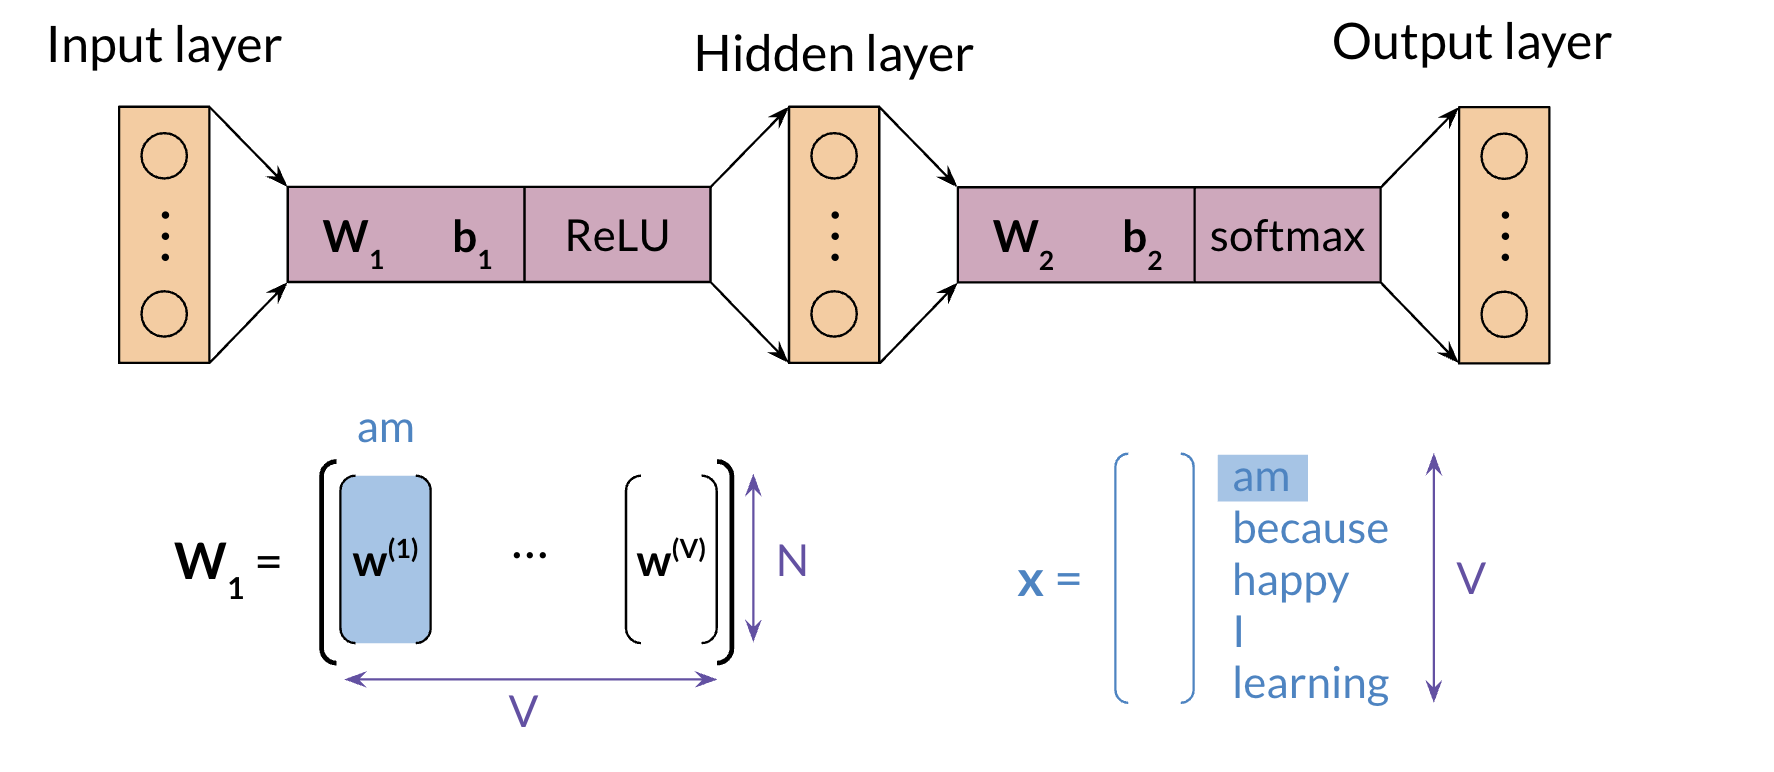</img>
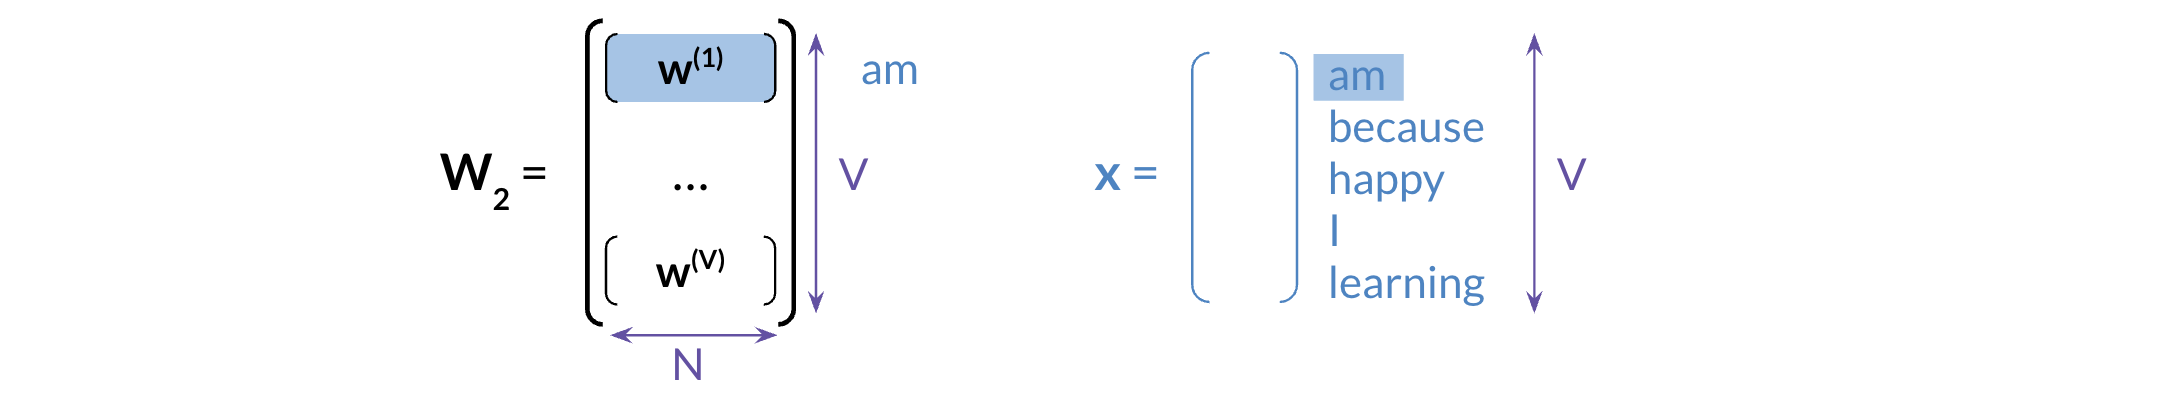</img>

In [22]:
word_embendding = (W[0] + W[1].transpose())/2

### Validando word embenddings

Duas formas de validação são mais discutidas:

1. Validação intrícica - Usa-se tecnicas de clusterização, ou comparação de analogias das palavras. 
2. Validação extrínseca - Aplica-se o word-embendding a outro modelo para ver se melhora a performance.

In [42]:
np.dot(word_embendding[:,vocabulary["criou"]]/np.linalg.norm(word_embendding[:,vocabulary["criou"]]),
       word_embendding[:,vocabulary["matou"]]/np.linalg.norm(word_embendding[:,vocabulary["matou"]]))

0.8587677690494089

9.443430840209084